<a href="https://colab.research.google.com/github/nouha45/Loan_prediction/blob/master/DataPreprocessing_LoanCredits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Data preprocessing

In [105]:
#read the data base 
df=pd.read_csv('/content/train_u6lujuX_CVtuZ9i.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [106]:
#detecting missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [107]:
df.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [108]:
df.describe()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [109]:
df.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [110]:
# diviser notre dataset selon le type 
cat_data=[]
num_data=[]
for i,c in enumerate(df.dtypes):
  if c==object:
    cat_data.append(df.iloc[:,i])
  else:
    num_data.append(df.iloc[:,i])
cat_data=pd.DataFrame(cat_data).transpose()
num_data=pd.DataFrame(num_data).transpose()

In [111]:
#pour les variables categoriques on va les remplacer per les valeurs qui se repete le plus
cat_data=cat_data.apply(lambda x:x.fillna(x.value_counts().index[0]))
cat_data.isnull().sum().any()

False

In [112]:
#pour les valeurs numeriques on va remplacer les valeurs manquantes par la valeurs precedantes de la meme colonne
num_data.fillna(method='bfill',inplace=True)
num_data.isnull().sum().any()

False

In [113]:
num_data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.0,0.0,128.0,360.0,1.0
1,4583.0,1508.0,128.0,360.0,1.0
2,3000.0,0.0,66.0,360.0,1.0
3,2583.0,2358.0,120.0,360.0,1.0
4,6000.0,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900.0,0.0,71.0,360.0,1.0
610,4106.0,0.0,40.0,180.0,1.0
611,8072.0,240.0,253.0,360.0,1.0
612,7583.0,0.0,187.0,360.0,1.0


In [114]:
# Tranformer la colonne target
target_value={'Y':1,'N':0}
target=cat_data['Loan_Status']
cat_data.drop('Loan_Status',axis=1,inplace=True)
target=target.map(target_value)
target

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [115]:
#remplacer les valeurs categoriques par les valeurs numeriques 
le=LabelEncoder()
for i in cat_data:
  cat_data[i]=le.fit_transform(cat_data[i])


In [116]:
cat_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,0,1,0,0,0,0,2
1,1,1,1,1,0,0,0
2,2,1,1,0,0,1,2
3,3,1,1,0,1,0,2
4,4,1,0,0,0,0,2
...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,0
610,610,1,1,3,0,0,0
611,611,1,1,1,0,0,2
612,612,1,1,2,0,0,2


In [117]:
#supprimer la colonne id
cat_data.drop('Loan_ID',axis=1,inplace=True)

In [118]:
#concatener cat_data avec num_data et specifier la colonne target
X=pd.concat([cat_data,num_data],axis=1)
Y=target

In [119]:
X

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,0,0,0,0,2,5849.0,0.0,128.0,360.0,1.0
1,1,1,1,0,0,0,4583.0,1508.0,128.0,360.0,1.0
2,1,1,0,0,1,2,3000.0,0.0,66.0,360.0,1.0
3,1,1,0,1,0,2,2583.0,2358.0,120.0,360.0,1.0
4,1,0,0,0,0,2,6000.0,0.0,141.0,360.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,2900.0,0.0,71.0,360.0,1.0
610,1,1,3,0,0,0,4106.0,0.0,40.0,180.0,1.0
611,1,1,1,0,0,2,8072.0,240.0,253.0,360.0,1.0
612,1,1,2,0,0,2,7583.0,0.0,187.0,360.0,1.0


In [120]:
Y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [121]:
#on va commencer par la variable target
target.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

le pourcentage des crédits accordés est: 0.6872964169381107
le pourcentage des crédits non accordés est: 0.3127035830618892


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


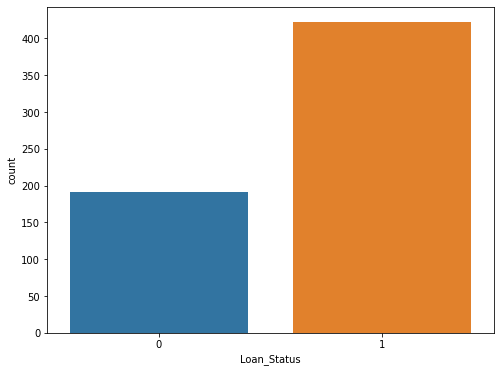

In [122]:
plt.figure(figsize=(8,6))
sns.countplot(target)
yes=target.value_counts() [1]/len(target)
no=target.value_counts() [0]/len(target)
print (f'le pourcentage des crédits accordés est: {yes}')
print (f'le pourcentage des crédits non accordés est: {no}')

In [123]:
! pip install -U imbalanced-learn


  Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)


# UnderSampling

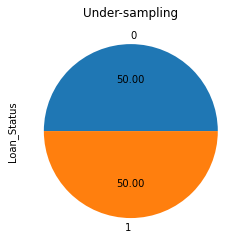

In [124]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy=1) # Numerical value
X_res, y_res = rus.fit_resample(X, Y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

In [125]:
# Class distribution
y_res.value_counts()


0    192
1    192
Name: Loan_Status, dtype: int64

# Oversampling

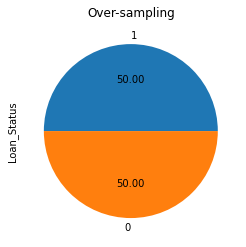

In [126]:
from imblearn.over_sampling import RandomOverSampler

#ros = RandomOverSampler(sampling_strategy=1) # Float
ros = RandomOverSampler(sampling_strategy="not majority") # String
X_res, y_res = ros.fit_resample(X, Y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [127]:
y_res.value_counts()


1    422
0    422
Name: Loan_Status, dtype: int64

# Classification Knn


In [128]:
#La base de donnees pour l'analyse exploratoire
df= pd.concat((X,Y) ,axis=1)
df


,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,1,0,0,0,0,2,5849.0,0.0,128.0,360.0,1.0,1
1,1,1,1,0,0,0,4583.0,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,2,3000.0,0.0,66.0,360.0,1.0,1
3,1,1,0,1,0,2,2583.0,2358.0,120.0,360.0,1.0,1
4,1,0,0,0,0,2,6000.0,0.0,141.0,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,2900.0,0.0,71.0,360.0,1.0,1
610,1,1,3,0,0,0,4106.0,0.0,40.0,180.0,1.0,1
611,1,1,1,0,0,2,8072.0,240.0,253.0,360.0,1.0,1
612,1,1,2,0,0,2,7583.0,0.0,187.0,360.0,1.0,1


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


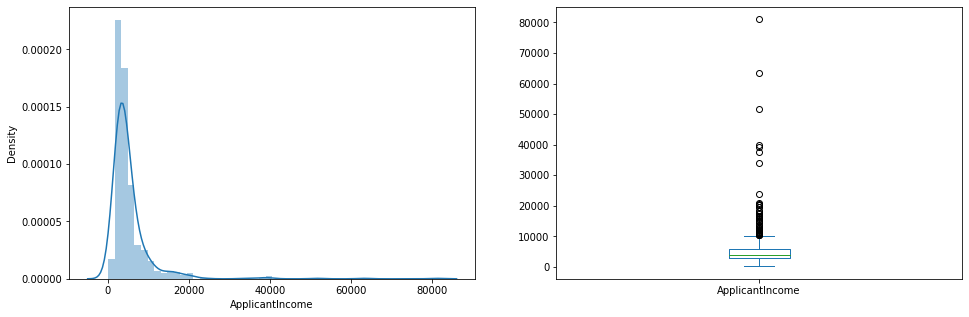

In [129]:
#Numerical Variable
plt.figure(1)
plt.subplot(121)
sns.distplot(df['ApplicantIncome']);

plt.subplot(122)
df['ApplicantIncome'].plot.box(figsize=(16,5))

plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


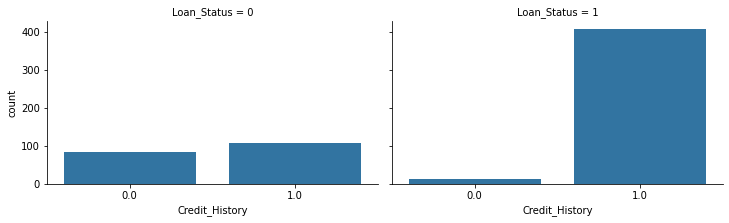

In [130]:
#Credit History
grid = sns.FacetGrid(df, col="Loan_Status", size=3.2, aspect= 1.6)
grid.map(sns.countplot,'Credit_History')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


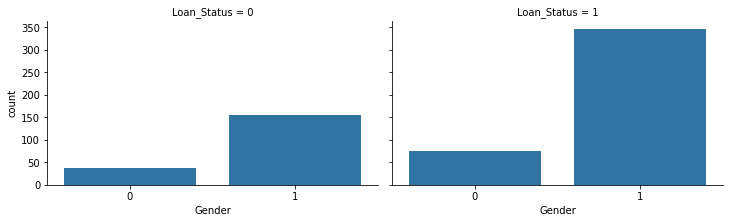

In [131]:
#Sexe
grid = sns.FacetGrid(df, col="Loan_Status", size=3.2, aspect= 1.6)
grid.map(sns.countplot,'Gender')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


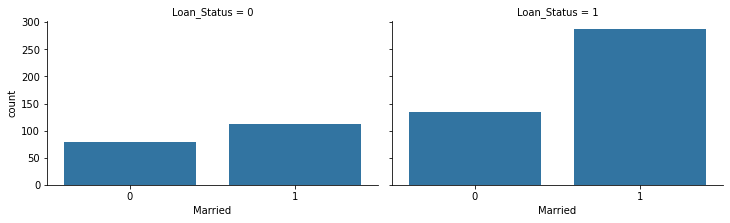

In [132]:

grid = sns.FacetGrid(df, col="Loan_Status", size=3.2, aspect= 1.6)
grid.map(sns.countplot,'Married')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


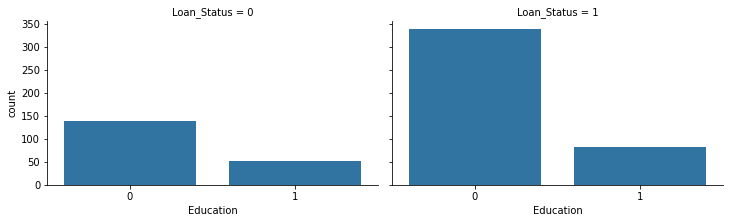

In [133]:
#Education
grid = sns.FacetGrid(df, col="Loan_Status", size=3.2, aspect= 1.6)
grid.map(sns.countplot,'Education')

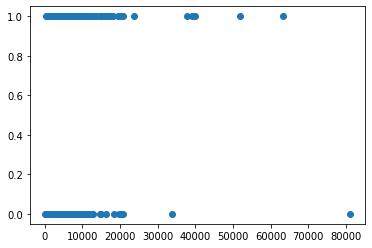

In [134]:
#revenu du demandeur
plt.scatter(df['ApplicantIncome'], df['Loan_Status'])

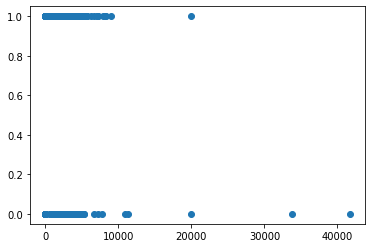

In [135]:
plt.scatter(df['CoapplicantIncome'], df['Loan_Status'])

In [136]:
df.groupby('Loan_Status').median()


,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,,,,,,,
0,1.0,1.0,0.0,0.0,0.0,1.0,3833.5,268.0,132.5,360.0,1.0
1,1.0,1.0,0.0,0.0,0.0,1.0,3812.5,1239.5,127.5,360.0,1.0


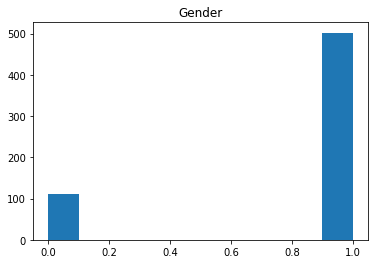

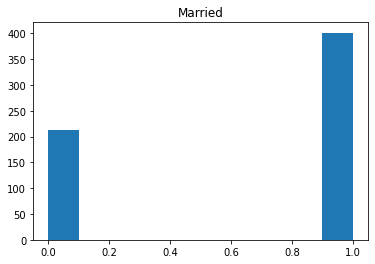

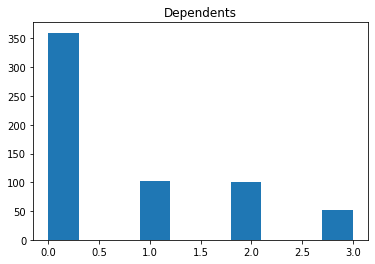

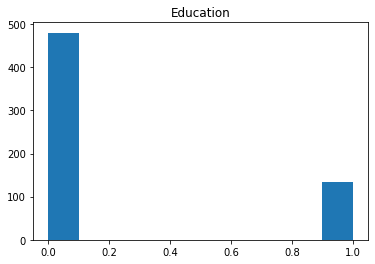

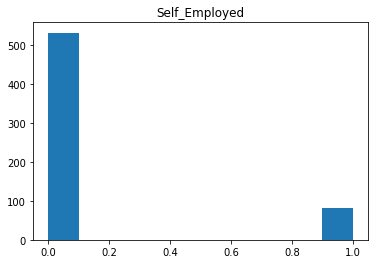

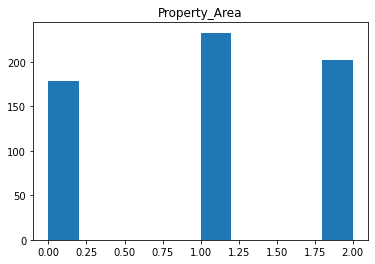

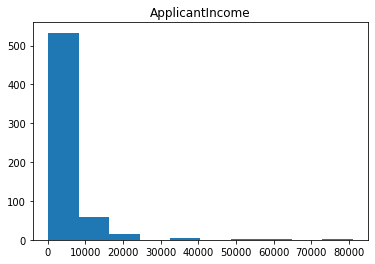

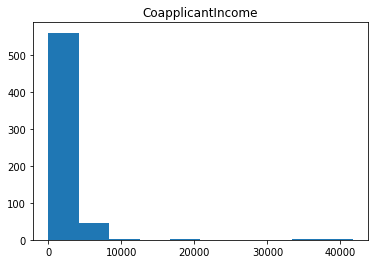

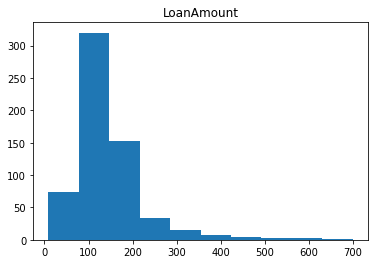

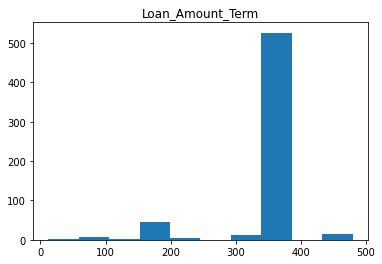

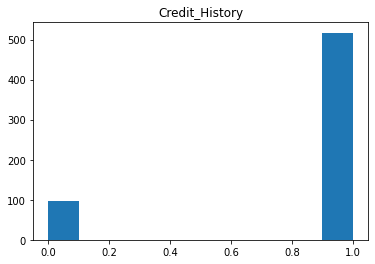

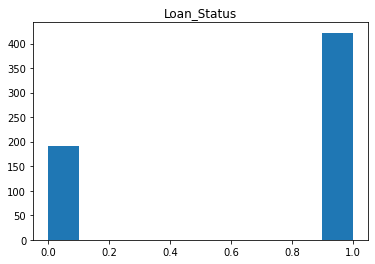

In [137]:
for i in df:
    plt.hist(df[i])
    plt.title(i)
    plt.show()

# **Correlation Matrix**

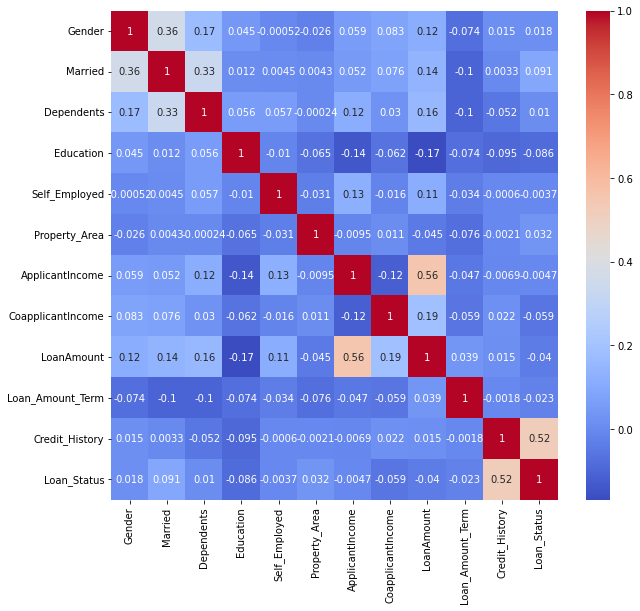

In [138]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10,9))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

In [139]:
#correlation table
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  This is separate from the ipykernel package so we can avoid doing imports until


,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
Gender,1.00,0.36,0.17,0.05,-0.00,-0.03,0.06,0.08,0.12,-0.07,0.02,0.02
Married,0.36,1.00,0.33,0.01,0.00,0.00,0.05,0.08,0.14,-0.10,0.00,0.09
Dependents,0.17,0.33,1.00,0.06,0.06,-0.00,0.12,0.03,0.16,-0.10,-0.05,0.01
Education,0.05,0.01,0.06,1.00,-0.01,-0.07,-0.14,-0.06,-0.17,-0.07,-0.10,-0.09
Self_Employed,-0.00,0.00,0.06,-0.01,1.00,-0.03,0.13,-0.02,0.11,-0.03,-0.00,-0.00
Property_Area,-0.03,0.00,-0.00,-0.07,-0.03,1.00,-0.01,0.01,-0.05,-0.08,-0.00,0.03
ApplicantIncome,0.06,0.05,0.12,-0.14,0.13,-0.01,1.00,-0.12,0.56,-0.05,-0.01,-0.00
CoapplicantIncome,0.08,0.08,0.03,-0.06,-0.02,0.01,-0.12,1.00,0.19,-0.06,0.02,-0.06
LoanAmount,0.12,0.14,0.16,-0.17,0.11,-0.05,0.56,0.19,1.00,0.04,0.02,-0.04
Loan_Amount_Term,-0.07,-0.10,-0.10,-0.07,-0.03,-0.08,-0.05,-0.06,0.04,1.00,-0.00,-0.02


**Observation**
We can clearly see that Credit_History has the highest correlation with Loan_Status (a positive correlation of 0.52). Therefore our target value is highly dependant on this column.

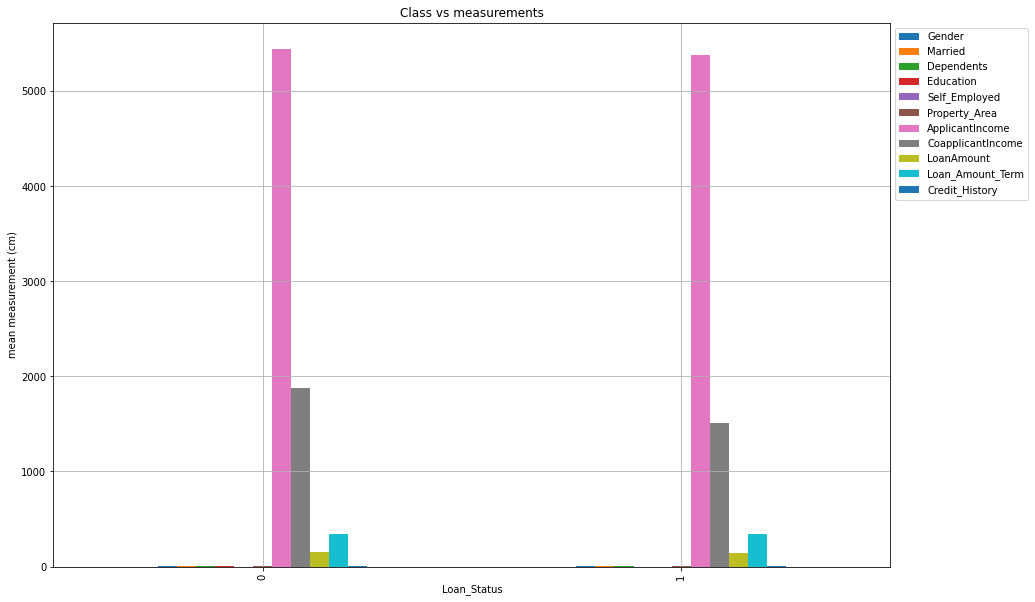

In [140]:
df.groupby(by = "Loan_Status").mean()
df.groupby(by="Loan_Status").mean().plot(kind="bar", figsize=(15,10))
plt.title('Class vs measurements')
plt.ylabel('mean measurement (cm)')
plt.grid(True)
plt.legend(loc="upper left", bbox_to_anchor=(1,1))

In [141]:
#KNN
#import modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score , confusion_matrix, precision_score,recall_score, classification_report
from sklearn.model_selection import train_test_split

In [142]:
# train - 70
# test - 30
# taking the training data features
X = df.drop(columns=['Loan_Status'])
# output of our training data = df['Loan_Status']
y = df['Loan_Status']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [143]:
#check the Train and Test Dataset
x_test

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
400,1,1,2,1,0,2,2889.0,0.0,45.0,180.0,0.0
276,1,1,0,0,0,1,3993.0,3274.0,207.0,360.0,1.0
516,0,1,2,0,0,1,2031.0,1632.0,113.0,480.0,1.0
141,1,0,0,0,0,2,5417.0,0.0,168.0,360.0,1.0
157,1,1,1,0,0,2,9538.0,0.0,187.0,360.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
492,1,0,0,1,0,0,3691.0,0.0,110.0,360.0,1.0
84,1,1,1,0,0,2,3988.0,0.0,50.0,240.0,1.0
317,1,1,0,0,0,2,2058.0,2134.0,88.0,360.0,1.0
590,1,1,0,0,0,1,3000.0,3416.0,56.0,180.0,1.0


In [144]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X,y)
y_model = model.predict(X)
accuracy_score(y,y_model)

0.7785016286644951

# **explication**
The value of k in the KNN algorithm is related to the error rate of the model. A small value of k could lead to overfitting as well as a big value of k can lead to underfitting. Overfitting imply that the model is well on the training data but has poor performance when new data is coming. Underfitting refers to a model that is not good on the training data and also cannot be generalized to predict new data.

**remarque **: il ne faut jamais evaluer la performance d'un modele sur les donnees d'entrainements


In [145]:
y_model = model.predict(x_test)
accuracy_score(y_test,y_model)

0.7621621621621621

# Validation du modèle KNN

1-shuffle the data in random order before splitting in some %

-->since the model is trained on different combinaison of data points so it will gives us different results every time we train it.

-->we can never assure that the train set we picked represents the whole dataset

In [148]:
#Hold out
model = KNeighborsClassifier(n_neighbors=5)
X = df.drop(columns=['Loan_Status'])
y = df['Loan_Status']
X1, X2, y1,y2 = train_test_split(X,y, random_state= np.random, train_size=0.7)
y_pred=model.fit(X1,y1).predict(X2)
y2_model=model.predict(X2)
print(accuracy_score(y2,y2_model))

0.6648648648648648


# **explication**
since the model is trained on different combination of data points so it will give us different results every time we train it

In [149]:
#2 fold
X1, X2, y1, y2 = train_test_split(X,y, random_state= 0, train_size=0.5)
y2_model = model.fit(X1,y1).predict(X2)
y1_model = model.fit(X2,y2).predict(X1)
accuracy_score(y1,y1_model), accuracy_score(y2, y2_model)

(0.6351791530944625, 0.6807817589576547)

In [150]:
#5 fold
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5)

array([0.63414634, 0.6097561 , 0.63414634, 0.58536585, 0.6147541 ])

In [151]:
#5 fold
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5, scoring ="f1_macro")

array([0.48621554, 0.5030303 , 0.47310804, 0.43143297, 0.51648537])

In [152]:
#lOOCV
from sklearn.model_selection import LeaveOneOut
scores = cross_val_score(model, X, y, cv =LeaveOneOut() )
scores.mean()

0.6221498371335505

In [153]:
X1, X2, y1, y2 = train_test_split(X,y, random_state= np.random, train_size=0.7)
y_pred=model.fit(X1,y1).predict(X2)
y2_model=model.predict(X2)
cm1= confusion_matrix(y2, y2_model)
print("Confusion Matrix: \n", cm1)
print(accuracy_score(y2, y2_model))
print(precision_score(y2, y2_model, average='weighted'))
print(recall_score(y2, y2_model, average='macro'))
print("Accuracy:", accuracy_score(y2, y2_model))
print("Confusion matrix:", confusion_matrix(y2, y2_model))
print("Classification report :", classification_report(y2, y2_model))

Confusion Matrix: 
 [[ 12  46]
 [ 13 114]]
0.6810810810810811
0.6396081081081081
0.5522671734998642
Accuracy: 0.6810810810810811
Confusion matrix: [[ 12  46]
 [ 13 114]]
Classification report :               precision    recall  f1-score   support

           0       0.48      0.21      0.29        58
           1       0.71      0.90      0.79       127

    accuracy                           0.68       185
   macro avg       0.60      0.55      0.54       185
weighted avg       0.64      0.68      0.64       185



In [154]:
cross_val_score(model, X, y, cv=5, scoring="accuracy").mean()

0.6156337465013995

In [155]:
cross_val_score(model, X, y, cv=5, scoring="recall_macro").mean()

0.4964574331756994

In [156]:
cross_val_score(model, X, y, cv=5, scoring="precision_macro").mean()

0.49229520623269174

In [157]:
cross_val_score(model, X, y, cv=5, scoring="f1_macro").mean()

0.4820544458466621

In [158]:
scores = cross_val_score(model, X, y, cv =LeaveOneOut(), scoring="accuracy")
scores.mean()

0.6221498371335505

In [160]:
import warnings
warnings.filterwarnings('always')  # "error", "ignore", "always", "default", "module" or "once"

warnings.filterwarnings('ignore')

In [161]:
scores = cross_val_score(model, X, y, cv =LeaveOneOut(), scoring="accuracy")
scores.mean()

0.6221498371335505

In [162]:
scores = cross_val_score(model, X, y, cv = LeaveOneOut(), scoring="recall_macro")
scores.mean()

0.6221498371335505

In [163]:
scores = cross_val_score(model, X, y, cv =LeaveOneOut(), scoring="precision_macro")
scores.mean()

0.6221498371335505

In [164]:
scores = cross_val_score(model, X, y, cv =LeaveOneOut(), scoring="f1_macro")
scores.mean()

0.6221498371335505

In [165]:
#Grid search
from sklearn.model_selection import GridSearchCV
#creat a new KNN model
Knn2 = KNeighborsClassifier()
K_range = list(range(1,31))
pram_grid = dict(n_neighbors = K_range)
grid = GridSearchCV(Knn2, pram_grid, cv = 10, scoring = 'accuracy')
grid.fit(X,y)
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.692199894235854
{'n_neighbors': 27}
KNeighborsClassifier(n_neighbors=27)


In [166]:
model=grid.best_estimator_
model.score(x_test,y_test)

0.7081081081081081

In [178]:
#Grid search
from sklearn.model_selection import GridSearchCV
#creat a new KNN model
Knn2 = KNeighborsClassifier()
K_range = list(range(1,21))
pram_grid = dict(n_neighbors = K_range)
grid = GridSearchCV(Knn2, pram_grid, cv = LeaveOneOut(), scoring = 'accuracy')
grid.fit(X,y)
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.6775244299674267
{'n_neighbors': 13}
KNeighborsClassifier(n_neighbors=13)


In [168]:
from sklearn.tree import DecisionTreeClassifier

In [169]:
#hold out 
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

# Predict Accuracy Score
y_pred = clf.predict(x_test)
cm1= confusion_matrix(y_test,y_pred )

print("Confusion Matrix: \n", cm1)
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average='weighted'))
print(recall_score(y_test, y_pred, average='macro'))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion matrix:", confusion_matrix(y_test, y_pred))
print("Classification report :", classification_report(y_test, y_pred))

Confusion Matrix: 
 [[23 31]
 [34 97]]
0.6486486486486487
0.654394114509246
0.5831919705965507
Accuracy: 0.6486486486486487
Confusion matrix: [[23 31]
 [34 97]]
Classification report :               precision    recall  f1-score   support

           0       0.40      0.43      0.41        54
           1       0.76      0.74      0.75       131

    accuracy                           0.65       185
   macro avg       0.58      0.58      0.58       185
weighted avg       0.65      0.65      0.65       185



In [170]:
cross_val_score(clf, X, y, cv=5, scoring="accuracy").mean()

0.7003465280554445

In [171]:
cross_val_score(clf, X, y, cv=5, scoring="recall_macro").mean()

0.6583069098084577

In [172]:
cross_val_score(clf, X, y, cv=5, scoring="f1_macro").mean()

0.6694501963143067

In [173]:
cross_val_score(clf, X, y, cv=5, scoring="f1_macro").mean()

0.6547567027574843

In [174]:
scores = cross_val_score(clf, X, y, cv =LeaveOneOut(), scoring="accuracy")
scores.mean()

0.7003257328990228

In [175]:
scores = cross_val_score(model, X, y, cv =LeaveOneOut(), scoring="f1_macro")
scores.mean()

0.6872964169381107

In [176]:
scores = cross_val_score(model, X, y, cv =LeaveOneOut(), scoring="precision_macro")
scores.mean()

0.6872964169381107

In [177]:
scores = cross_val_score(model, X, y, cv =LeaveOneOut(), scoring="recall_macro")
scores.mean()

0.6872964169381107

In [179]:
clf1=DecisionTreeClassifier()
pgrid = {"max_depth": [1, 2, 3, 4, 5, 6, 7],
      "min_samples_split": [2, 3, 5, 10, 15, 20]}
grid1=GridSearchCV(clf1, param_grid=pgrid, cv=5,scoring="accuracy")
grid1.fit(X,y)
print(grid1.best_score_)
print(grid1.best_params_)
print(grid1.best_estimator_)

0.8029721444755431
{'max_depth': 1, 'min_samples_split': 2}
DecisionTreeClassifier(max_depth=1)
